In [2]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Download the data
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-04 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2515 non-null   float64
 1   High       2515 non-null   float64
 2   Low        2515 non-null   float64
 3   Close      2515 non-null   float64
 4   Adj Close  2515 non-null   float64
 5   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.5 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,27.561969,27.806542,27.312041,27.568102,25.429357,2.996722e+08
std,13.996451,14.118351,13.894065,14.016253,14.062679,2.352933e+08
min,6.870357,7.000000,6.794643,6.858929,5.837759,4.544800e+07
25%,16.242322,16.345000,16.047500,16.178214,13.966663,1.247618e+08
50%,24.770000,25.055000,24.592501,24.860001,22.535618,2.220316e+08
75%,37.532501,37.956251,37.273750,37.611250,35.623562,4.068050e+08
max,72.779999,73.492500,72.029999,72.879997,71.290047,1.880998e+09


In [7]:
df.shape

(2515, 6)

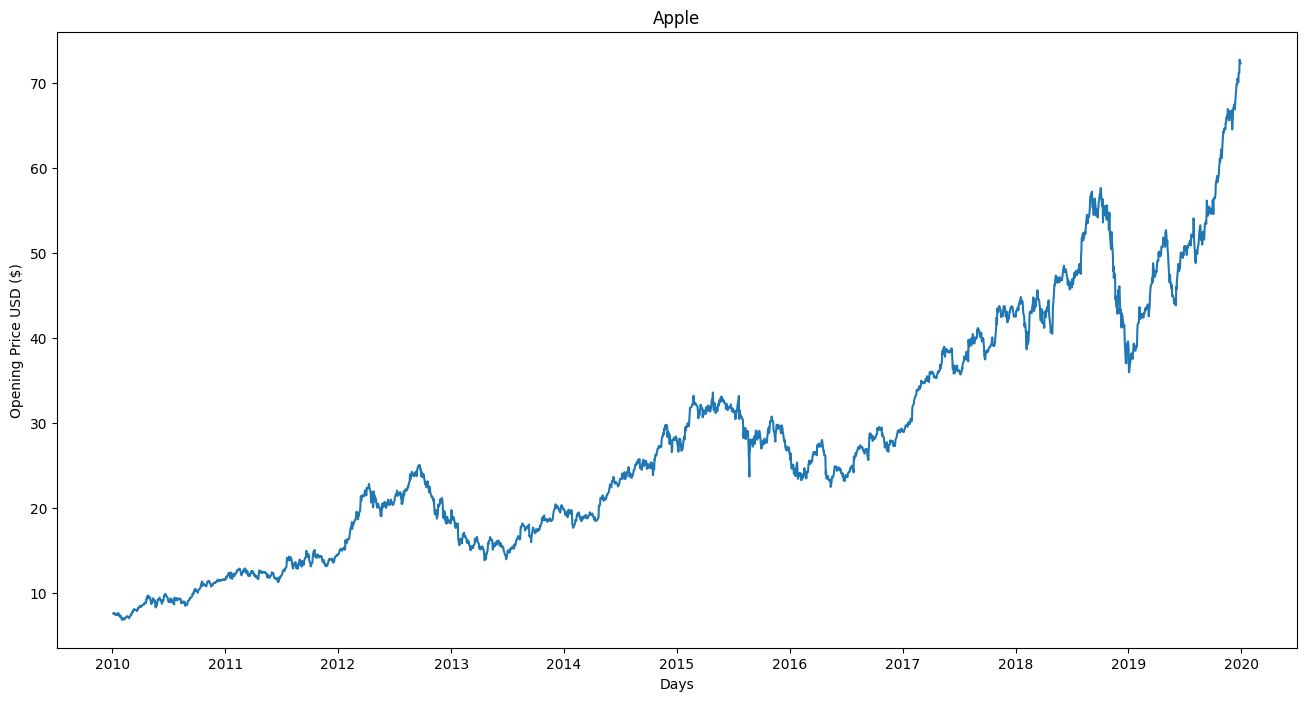

In [9]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

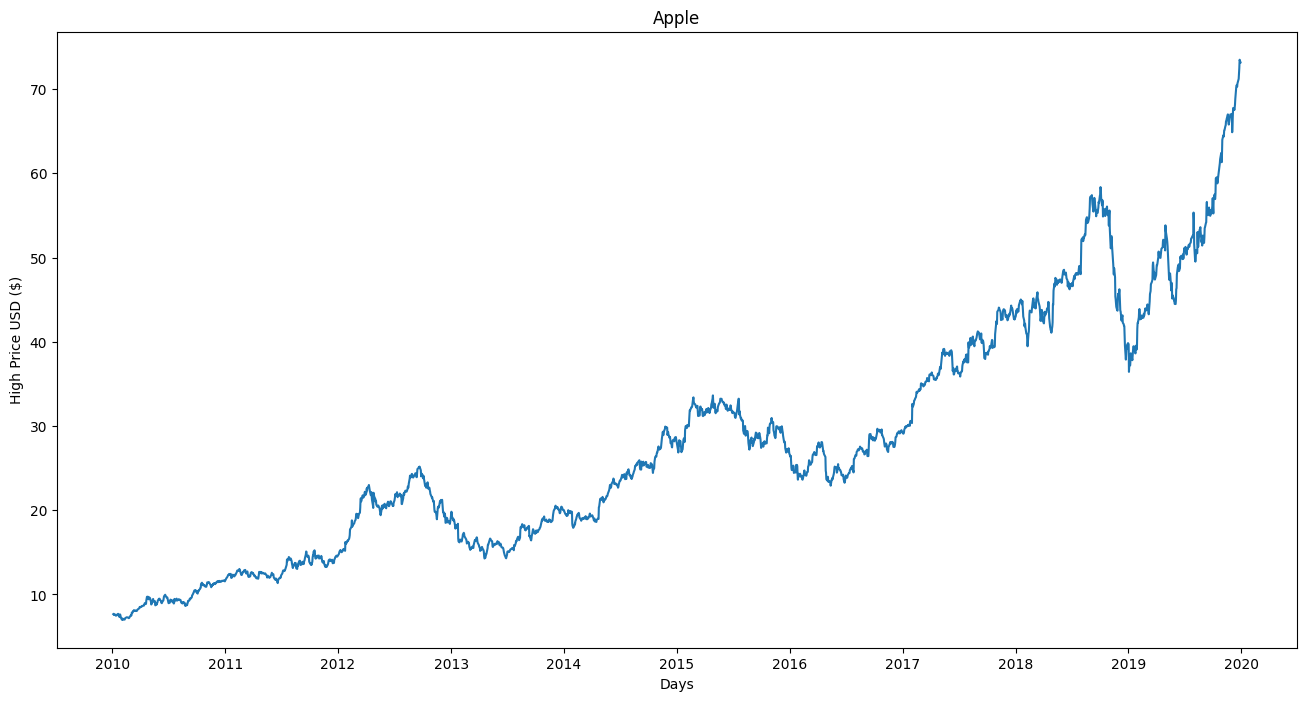

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

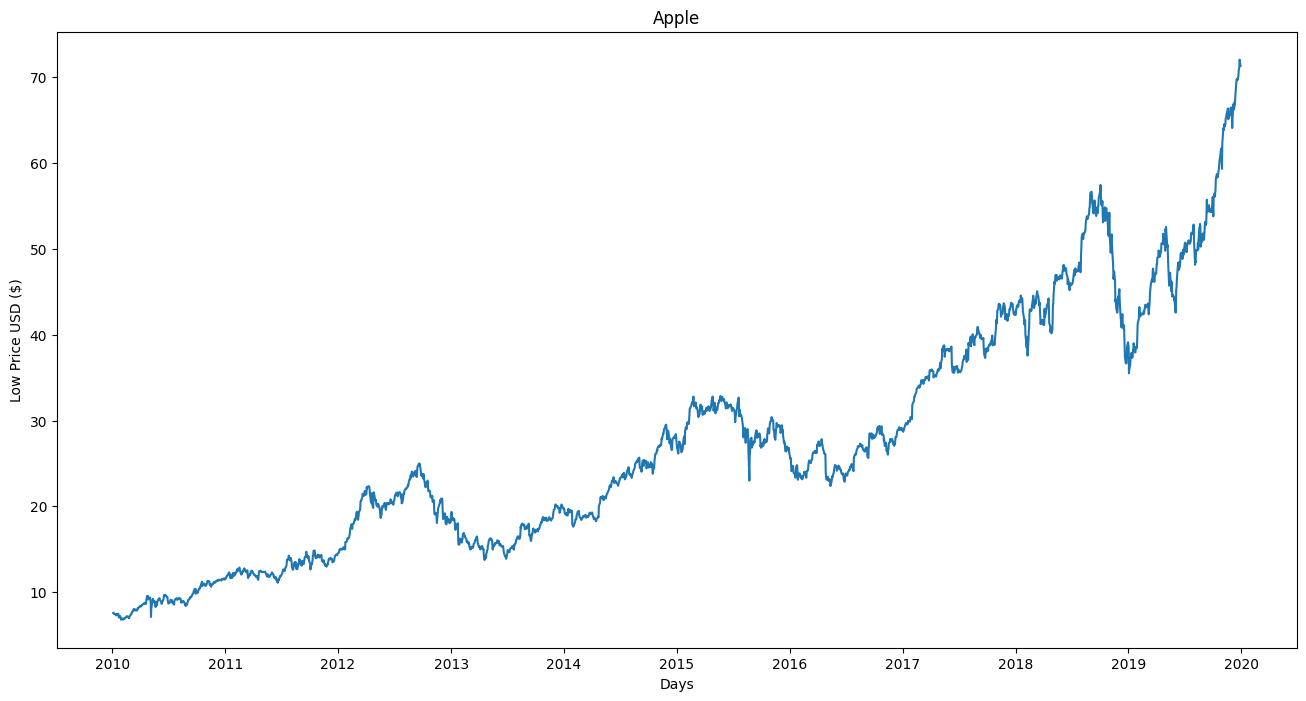

In [11]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

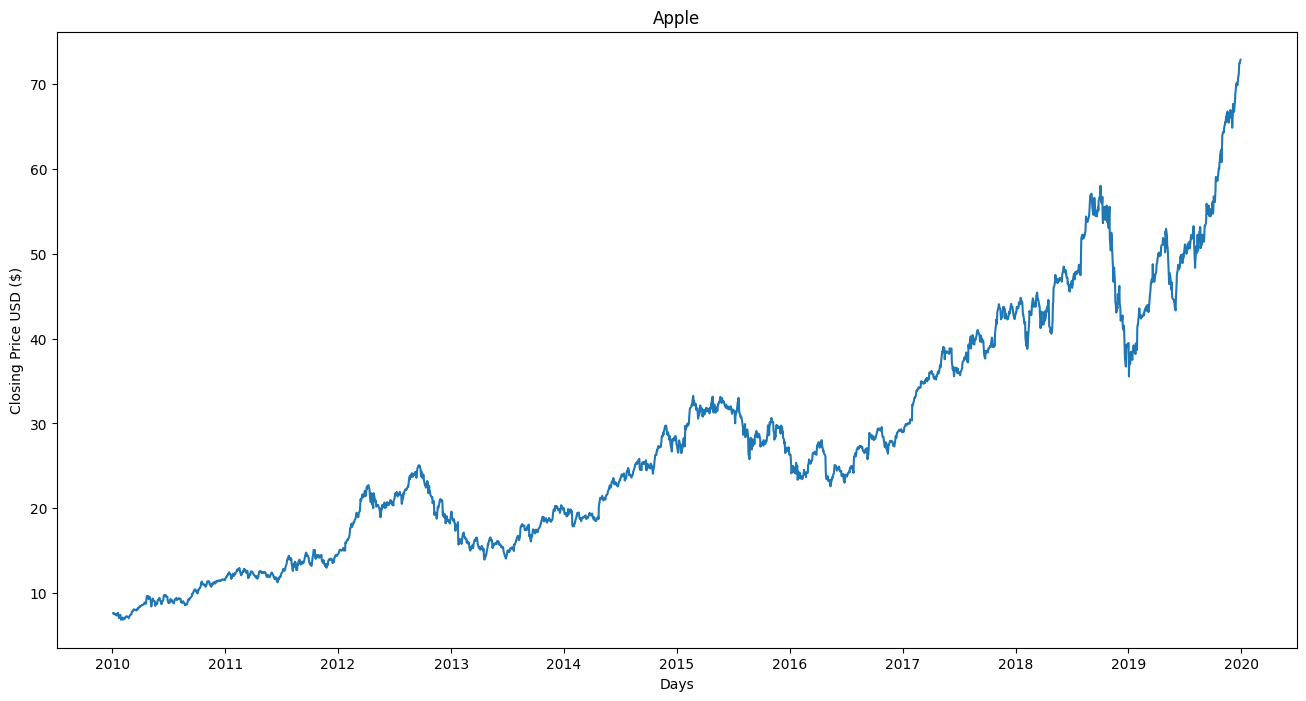

In [12]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [13]:
df2 = df['Close']

In [14]:
df2.tail()


Date
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, dtype: float64

In [15]:
df2 = pd.DataFrame(df2)     

In [16]:
df2.tail()

,Close
Date,
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501
2019-12-27,72.449997
2019-12-30,72.879997


In [18]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [19]:
df2.tail()

,Close,Prediction
Date,,
2019-12-23,71.000000,NaN
2019-12-24,71.067497,NaN
2019-12-26,72.477501,NaN
2019-12-27,72.449997,NaN
2019-12-30,72.879997,NaN


In [21]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[ 7.64321423]
 [ 7.65642881]
 [ 7.53464317]
 ...
 [48.33499908]
 [49.25      ]
 [49.75999832]]


In [22]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 9.04821396  9.17428589  9.31535721 ... 72.47750092 72.44999695
 72.87999725]


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [25]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [27]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[47.00500107],
       [46.63249969],
       [47.04000092],
       [48.77249908],
       [47.76250076],
       [47.18500137],
       [46.69749832],
       [47.11750031],
       [47.18000031],
       [47.48749924],
       [47.81000137],
       [48.50500107],
       [48.83750153],
       [48.92250061],
       [49.25      ],
       [50.02500153],
       [49.875     ],
       [50.15499878],
       [49.73749924],
       [49.71749878],
       [49.80749893],
       [49.8125    ],
       [50.78250122],
       [50.96500015],
       [51.13249969],
       [51.86999893],
       [51.79000092],
       [51.31999969],
       [51.07500076],
       [51.15250015],
       [50.16749954],
       [52.63000107],
       [52.28749847],
       [52.9375    ],
       [52.11999893],
       [50.71500015],
       [50.72499847],
       [50.18000031],
       [49.29499817],
       [46.43000031],
       [47.16500092],
       [47.72999954],
       [47.52000046],
       [47.25      ],
       [45.77249908],
       [46

In [28]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[50.85749817 50.24750137 50.11999893 51.62250137 46.20500183 51.46125031
 51.625      52.58750153 52.59000015 53.15999985 53.11500168 50.65999985
 51.62250137 51.04000092 61.91624832 52.25249863 52.18500137 51.42499924
 52.29750061 53.31999969 72.87999725 72.87999725 66.8125     55.89749908
 66.39499664 51.24875069 67.69249725 55.17499924 55.69250107 55.24000168
 54.43249893 54.68000031 35.54750061 55.25749969 54.97249985 54.70500183
 55.99250031 56.14749908 54.74000168 49.8125     56.75249863 56.76499939
 56.09999847 56.75749969 57.52249908 59.05250168 58.96749878 58.83000183
 58.59249878 58.81999969 59.10250092 60.12749863 59.99000168 52.20999908
 60.89500046 61.64500046 62.26250076 60.82249832 60.81499863 62.18999863
 63.95500183 49.875      64.28250122 64.30999756 64.85749817 65.03500366
 65.55000305 65.48999786 64.85749817 51.04000092 66.77500153 66.77500153
 66.57250214 65.79750061 65.50250244 65.44499969 66.59249878 66.07250214
 36.70750046 66.8125     66.04000092 64.86250305 65

In [29]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[49.69934449 49.31788223 49.7351863  51.50936143 50.47506659 49.88367488
 49.38444446 49.81455001 49.87855351 50.19344963 50.52370988 51.23542848
 51.57592757 51.66297139 51.9983491  52.79199406 52.6383841  52.92511853
 52.49757562 52.47709403 52.56925923 52.5743806  53.56771617 53.75460529
 53.9261342  54.68137472 54.59945227 54.1181447  53.86725208 53.94661579
 52.93792001 55.45965946 55.10891762 55.77455558 54.93738871 53.49859129
 53.50883013 52.95072149 52.04442975 49.11051151 49.86319329 50.44178353
 50.2267327  49.95023712 48.43719345 49.33580508 48.35782973 47.55906731
 47.38241702 47.19296526 46.9753557  47.21088811 46.38396399 45.93081812
 47.55394593 48.29638497 48.98250451 50.24465165 50.8667677  51.43767782
 51.27895039 51.26870765 50.90773088 51.20214541 52.36956862 52.22108003
 52.62814526 52.45405371 52.40285169 51.63225096 52.71518908 52.69982887
 52.23388151 53.16321358 53.46530822 53.89541377 53.84932922 52.77151247
 53.08384986 53.59331522 53.2144156  53.61123808 54

In [30]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/var/folders/36/q3sgzjcd3l1b0n7xjq65pmsm0000gn/T/ipykernel_1361/4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


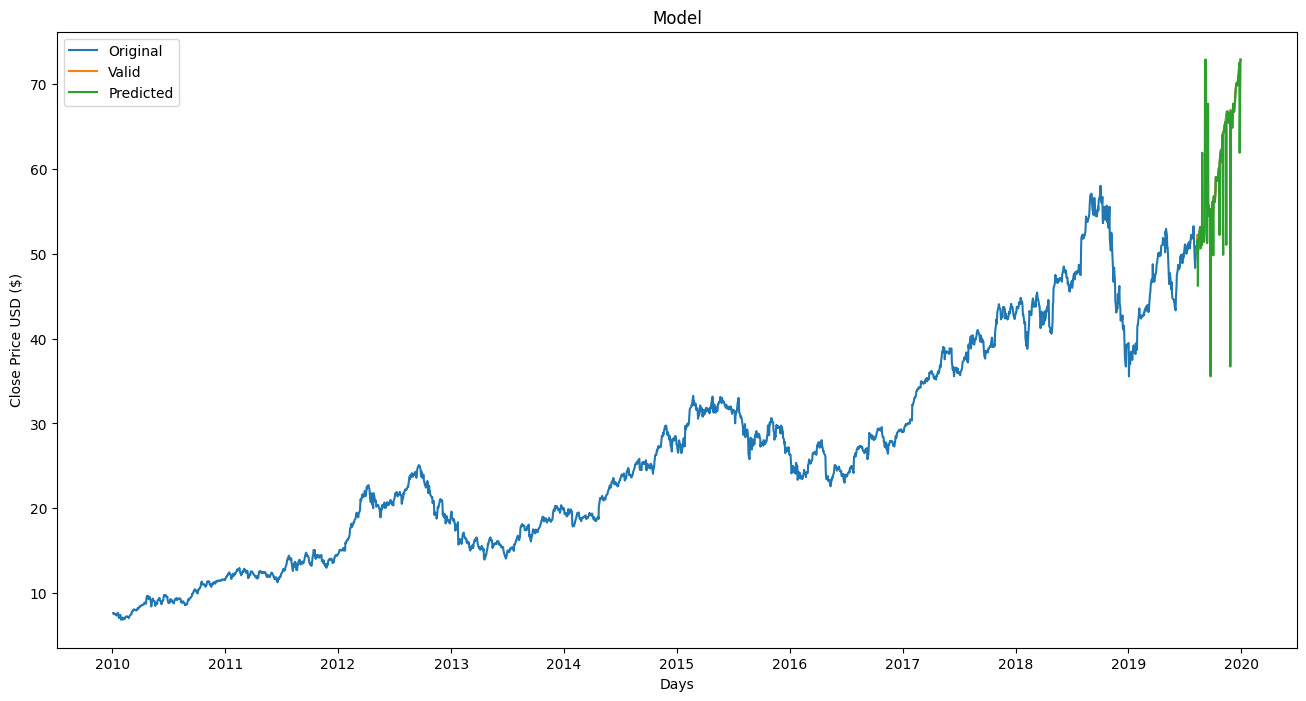

In [32]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()